In [1]:
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RESULTS_PATH = '../data/results'

In [3]:
# for each folder in the RESULTS_PATH directory (each folder corresponds to a different experiment) with a scores.json file
scores = {}
for folder in os.listdir(RESULTS_PATH):
    scores_path = os.path.join(RESULTS_PATH, folder, 'scores.json')
    if os.path.exists(scores_path):
        with open(scores_path) as f:
            scores[folder] = json.load(f)
            

In [4]:
# create a DataFrame with the scores
scores_df = pd.DataFrame(scores)
# set score_name as index
scores_df['score_name'] = scores_df.index

# melt the DataFrame to have a column for each experiment
scores_df = pd.melt(scores_df, id_vars='score_name', var_name='experiment', value_name='score')


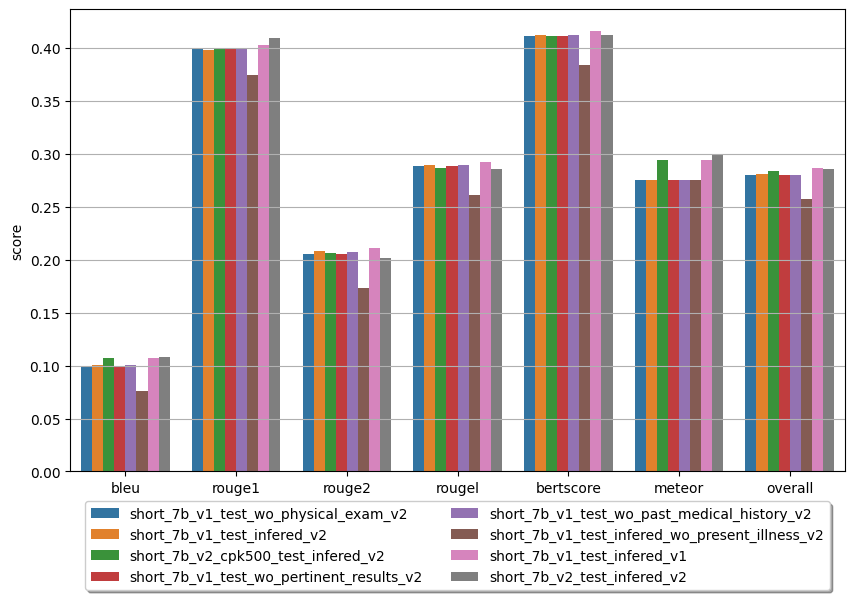

In [5]:
# plot histogram grouped by score type (column)
fig = plt.figure(figsize=(10, 6))
plt.grid()
sns.barplot(data=scores_df, x="score_name", y="score", hue="experiment")
# legend under the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)